# MyBatis

> SQL 매핑 프레임워크  
> SQL문과 저장 프로시저(Stored Procedure) 등의 매핑을 
지원하는 퍼시스턴스 프레임워크(persistence framework)  
> - 프로시저: 쿼리문들의 집합.   

> JDBC로 처리하는 상당부분의 코드와 파라미터 설정 및 결과 처리를 대신해준다.
> `Map` 인터페이스, 자바 `POJO`를 설정 데이터베이스와 매핑해서 사용할 수 있다.  
> `XML`과 `Annotation` 설정을 통해 사용 가능

## 구성 요소

MyBatis는 `SqlSession` 인터페이스를 통해 DB와 상호작용한다.  

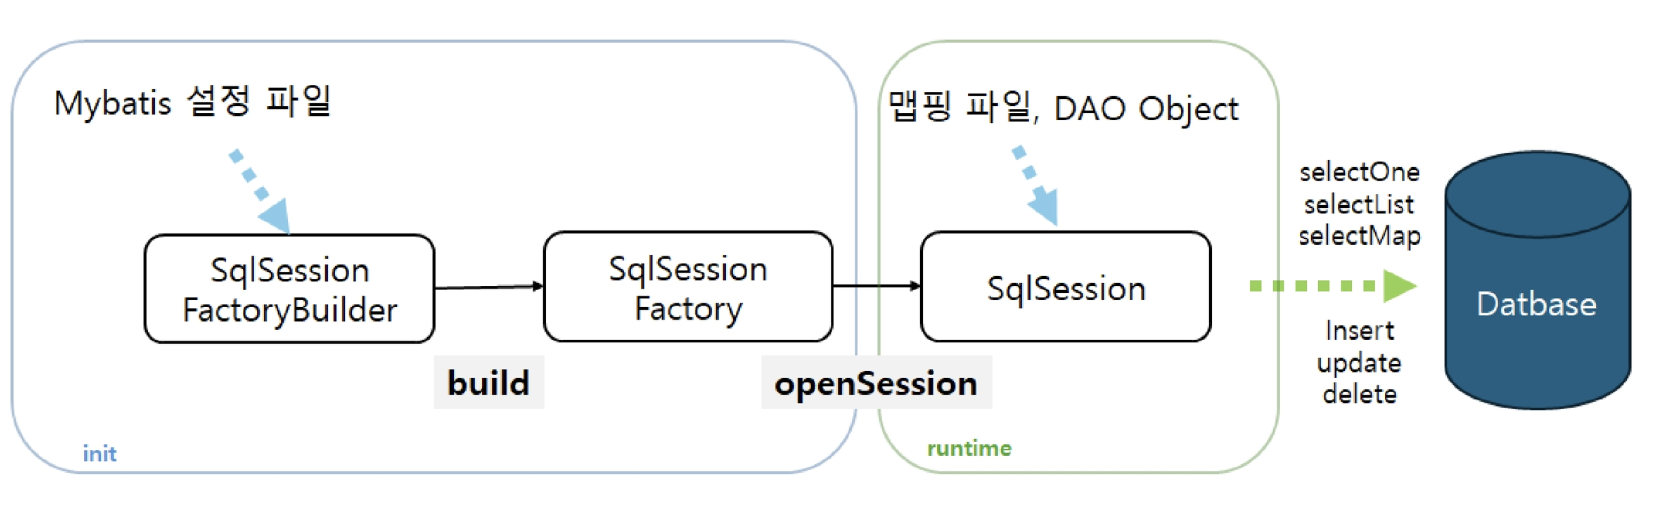


### MyBatis 설정 파일

- MyBatis 전반에 걸친 세팅
- DB 접속 정보, 모델 클래스 정보, 매핑 정보
- XML, Annotation, Java 설정을 만들 수 있다.

### `SqlSessionFactoryBuilder`

> `SqlSessionFactory` 인스턴스를 생성하는 데 사용되는 빌더 클래스

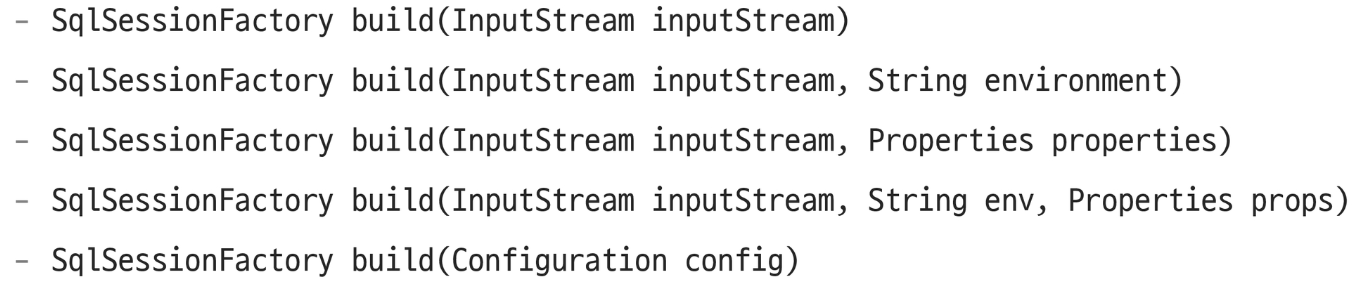
- 파라미터 = 설정파일

### `SqlSessionFactory`

> `SqlSession` 객체를 생성하는 팩토리 클래스
- 런타임 도중 `CRUD` 요청에 따라 `SqlSession` 객체 생성
- `openSession()` 메서드로 객체 생성

### `SqlSession`

> SQL 실행이나 트랜잭션 관리를 위한 메서드를 가진 인터페이스
- `SELECT`, `INSERT`, `UPDATE`, `DELETE` 구문을 수행하기 위해 사용
- `SqlSession`은 반드시 닫도록 한다.
    - `close()`
    - `try with resources`

## MyBatis 시작하기

`Maven Project` -> `pom.xml`에 의존성 추가
- [MvnRepository](https://mvnrepository.com/artifact/com.mysql/mysql-connector-j/8.3.0)에서 `MySQL connector/J` 추가
- [MvnRepository](https://mvnrepository.com/artifact/org.mybatis/mybatis/3.5.17)에서 `MyBatis` 추가

```xml
<dependency>
    <groupId>com.mysql</groupId>
    <artifactId>mysql-connector-j</artifactId>
    <version>8.3.0</version>
</dependency>
<dependency>
    <groupId>org.mybatis</groupId>
    <artifactId>mybatis</artifactId>
    <version>3.5.17</version>
</dependency>
```

소스폴더 `resources`를 만들고 그 안에 `mybatis-config.xml` 파일 생성  

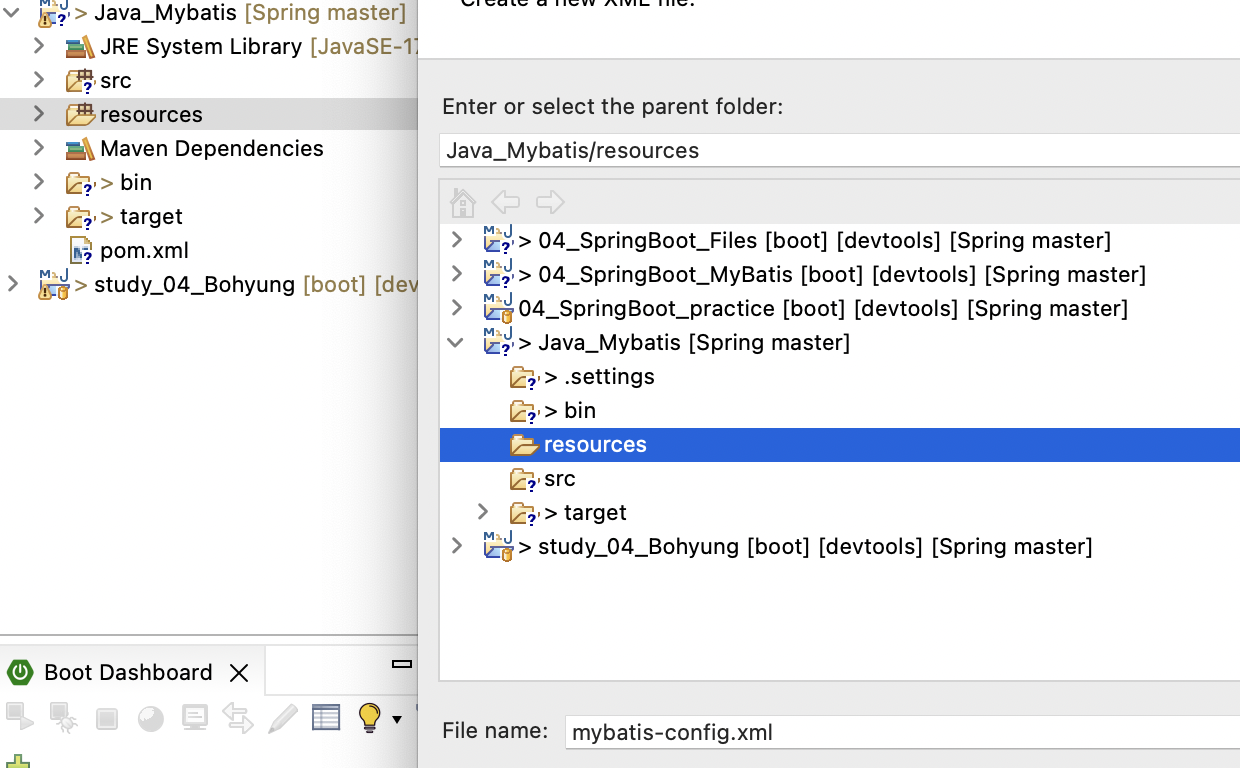

[MyBatis.org](https://mybatis.org/mybatis-3/getting-started.html#building-sqlsessionfactory-from-xml)에서 `xml`파일 부분을 복붙한다.
```xml
<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE configuration
  PUBLIC "-//mybatis.org//DTD Config 3.0//EN"
  "https://mybatis.org/dtd/mybatis-3-config.dtd">
<configuration>
  <environments default="development">
    <environment id="development">
      <transactionManager type="JDBC"/>
      <dataSource type="POOLED">
        <property name="driver" value="${driver}"/>
        <property name="url" value="${url}"/>
        <property name="username" value="${username}"/>
        <property name="password" value="${password}"/>
      </dataSource>
    </environment>
  </environments>
</configuration>
```
- `<mapper>`부분은 지워준다.
- 이 설정파일은 작성하는 순서가 중요하므로 순서를 바꾸지 말자.

## MyBatis 설정하기

### typeAliases
- 타입 별칭은 자바 타입에 대한 짧은 이름, XML 설정에서만 사용
- 클래스 단위나 패키지 단위로 등록할 수 있음
- 이름을 지정하지 않으면 소문자로 바뀐 형태의 값이 지정됨
- [typeAliases](https://mybatis.org/mybatis-3/configuration.html#typealiases)

### environments
- 여러 개의 환경으로 설정할 수 있음
    - 개발, 테스트, 실제 환경 ... 
- [environments](https://mybatis.org/mybatis-3/configuration.html#environments-1)

### mappers
- 매핑된 SQL 구문 설정파일의 위치 작성
- `classpath`의 상대경로의 리소스 사용
- 절대경로의 url 사용
- `mapper` 인터페이스 사용
- 매퍼 패키지 내의 모든 인터페이스를 등록

`mybatis-config.xml`에서 `${}`로 지정된 설정을 하드코딩해준다.
- 다른 설정파일에서 불러오도록 하는 게 맞지만..
```xml
<dataSource type="POOLED">
    <property name="driver" value="com.mysql.cj.jdbc.Driver"/>
    <property name="url" value="jdbc:mysql://localhost:3306/ssafy_board?serverTimezone=UTC"/>
    <property name="username" value="ssafy"/>
    <property name="password" value="ssafy"/>
</dataSource>
```